In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime
import glob
import pickle
from datetime import datetime, timedelta
import sys
from scipy.optimize import curve_fit

#import the folder that has the analysis level class
sys.path.append("../CombinedData/")
sys.path.append("../AnalysisTools/")
import Dataset
import AnalysisTools

In [13]:
topdirs = {5:"../../data/Run5/", 6:"../../data/Run6/", 7:"../../data/Run7/", 8:"../../data/Run8/"}
configs = {5:"../configs/run5_config.yaml", 6:"../configs/run6_config.yaml", 7:"../configs/run7_config.yaml", 8:"../configs/run8_config.yaml"}
red_file_name = "combined_reduced.p"
#analysis tools objects, unloaded data
anas = {}
for n in topdirs:
    anas[n] = AnalysisTools.AnalysisTools(topdirs[n]+red_file_name, configs[n])


{'channel_map': {'ad2_channel': [0, 1], 'prereduced_index': [0, 1], 'software_channel': [2, 3]}, 'filter_tau': 0, 'polarity': -1, 'no_pulse_threshold': 0, 'fit_amplitude_threshold': 0.002, 'integration_window': [400, 1000], 'baseline_window': [0, 400]}
{'channel_map': {'ad2_channel': [0, 1], 'prereduced_index': [0, 1], 'software_channel': [2, 3]}, 'filter_tau': 0, 'polarity': -1, 'no_pulse_threshold': 0, 'fit_amplitude_threshold': 0.002, 'integration_window': [400, 1000], 'baseline_window': [0, 400]}
{'channel_map': {'ad2_channel': [0, 1], 'prereduced_index': [0, 1], 'software_channel': [2, 3]}, 'filter_tau': 0, 'polarity': -1, 'no_pulse_threshold': 0, 'fit_amplitude_threshold': 0.002, 'integration_window': [400, 1000], 'baseline_window': [0, 400]}
{'channel_map': {'ad2_channel': [0, 1], 'prereduced_index': [0, 1], 'software_channel': [2, 3]}, 'filter_tau': 0, 'polarity': -1, 'no_pulse_threshold': 0, 'fit_amplitude_threshold': 0.002, 'integration_window': [400, 1000], 'baseline_window'

In [14]:
#load data into mem if you want
for n, ana in anas.items():
    ana.load_dataframe()

## PMT Amplitudes

In [ ]:
#reproduce some of the plots above
for run, ana in anas.items():
    d = ana.df
    fig, ax = plt.subplots()
    h = np.array(d["ch0 amp"])
    h = h[~np.equal(h, None)]
    binwidth = 10 #mV
    bins = np.arange(min(h), max(h), binwidth)
    ax.hist(h, bins=bins, label="ch 0", alpha=0.6)

    h = np.array(d["ch1 amp"])
    h = h[~np.equal(h, None)]
    binwidth = 10 #mV
    bins = np.arange(min(h), max(h), binwidth)
    ax.hist(h, bins=bins, label="ch 1", alpha=0.6)

    ax.legend()
    ax.set_xlabel("primary pulse amplitude [mV]")
    ax.set_ylabel("events per {:.1f} mV binwidth".format(binwidth))
    ax.set_title("All PMT primary amplitudes in run {:d} ({:d} events)".format(run, len(h)))
    ax.set_yscale('log')
    plt.show()

In [ ]:
d = anas[7].df

fig, ax = plt.subplots()
h1 = np.array(d["ch0 trigger integral"])
#h1 = h1[~np.equal(h, None)]
h2 = np.array(d["ch0 amp"])
#h2 = h2[~np.equal(h, None)]
ax.scatter(h2, h1, alpha=0.2, s=5, label="All PMT events during HV ramping")

d = ds.reduced_df
h1 = np.array(d["ch0 trigger integral"])
#h1 = h1[~np.equal(h, None)]
h2 = np.array(d["ch0 amp"])
#h2 = h2[~np.equal(h, None)]
ax.scatter(h2, h1, alpha=0.2, s=5, label="Cosmics no HV")


ax.legend(markerscale=8)
ax.set_ylim([-1, 6])
ax.set_xlim([0, 200])
ax.set_xlabel("primary pulse amplitude [mV]")
ax.set_ylabel("primary pulse integral [mV*us]")
ax.set_title("All of Run 7 PMT events, at 0V and HV ramping separated")
#ax.set_yscale('log')
plt.show()

In [ ]:
for run, ana in anas.items():
    d = ana.df
    ch0_int = np.array(d["ch0 afterpulse integral"])
    ch0_int = ch0_int[~np.equal(ch0_int, None)]
    ch0_base = np.array(d["ch0 postbaseline"])
    ch0_base = 7.5*ch0_base[~np.equal(ch0_base, None)]
    ch0_int = ch0_int - ch0_base

    ch1_int = np.array(d["ch1 afterpulse integral"])
    ch1_int = ch1_int[~np.equal(ch1_int, None)]
    ch1_base = np.array(d["ch1 postbaseline"])
    ch1_base = 7.5*ch1_base[~np.equal(ch1_base, None)]
    ch1_int = ch1_int - ch1_base

    total_int = ch1_int + ch0_int

    fig, ax = plt.subplots()
    ax.hist(total_int, 100)
    ax.set_yscale('log')
    plt.show()


## Anode charge

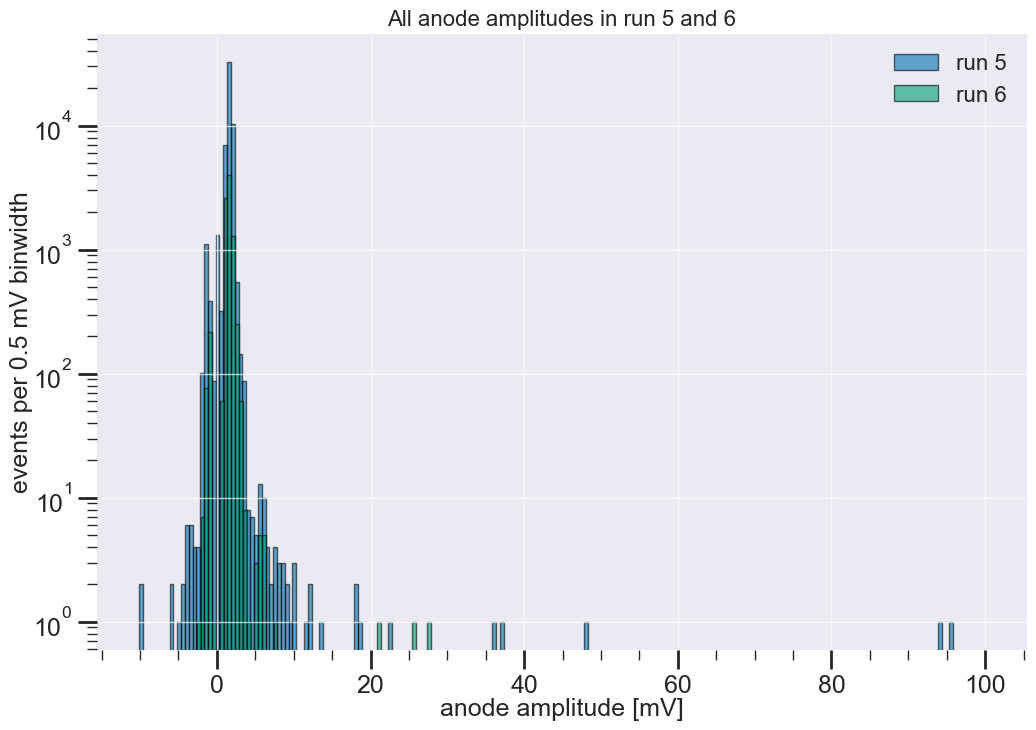

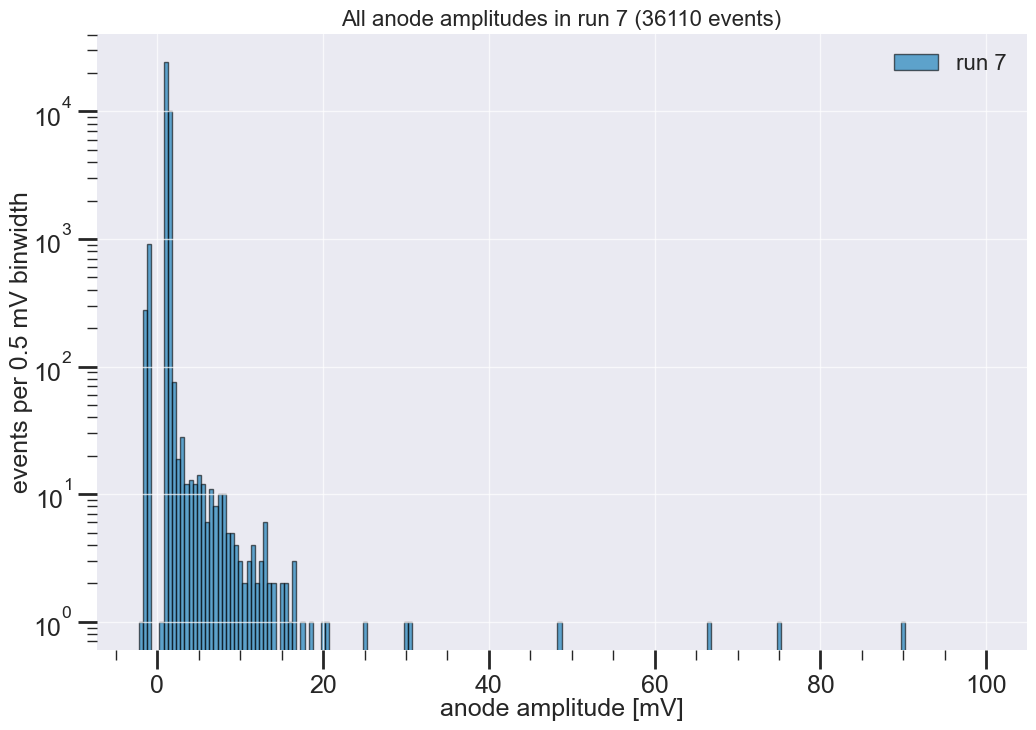

In [16]:

fig, ax = plt.subplots()
#amplitude of charge channels
d = anas[5].df
h = np.array(d["ch3 amp"])
h = h[~np.equal(h, None)]
binwidth = 0.5 #mV
#protect against huge bounds and misreconstructed amplitudes
bins = np.arange(min(h), 100, binwidth)
ax.hist(h, bins=bins, label="run 5", alpha=0.6)
d = anas[6].df
h = np.array(d["ch3 amp"])
h = h[~np.equal(h, None)]
binwidth = 0.5 #mV
#protect against huge bounds and misreconstructed amplitudes
bins = np.arange(min(h), 100, binwidth)
ax.hist(h, bins=bins, label="run 6", alpha=0.6)

ax.legend()
ax.set_xlabel("anode amplitude [mV]")
ax.set_ylabel("events per {:.1f} mV binwidth".format(binwidth))
ax.set_title("All anode amplitudes in run 5 and 6")
ax.set_yscale('log')
plt.show()


fig, ax = plt.subplots()
d = anas[7].df
h = np.array(d["ch3 amp"])
h = h[~np.equal(h, None)]
binwidth = 0.5 #mV
#protect against huge bounds and misreconstructed amplitudes
bins = np.arange(min(h), 100, binwidth)
ax.hist(h, bins=bins, label="run 7", alpha=0.6)

ax.legend()
ax.set_xlabel("anode amplitude [mV]")
ax.set_ylabel("events per {:.1f} mV binwidth".format(binwidth))
ax.set_title("All anode amplitudes in run {:d} ({:d} events)".format(7, len(h)))
ax.set_yscale('log')
plt.show()

## Peak multiplicities

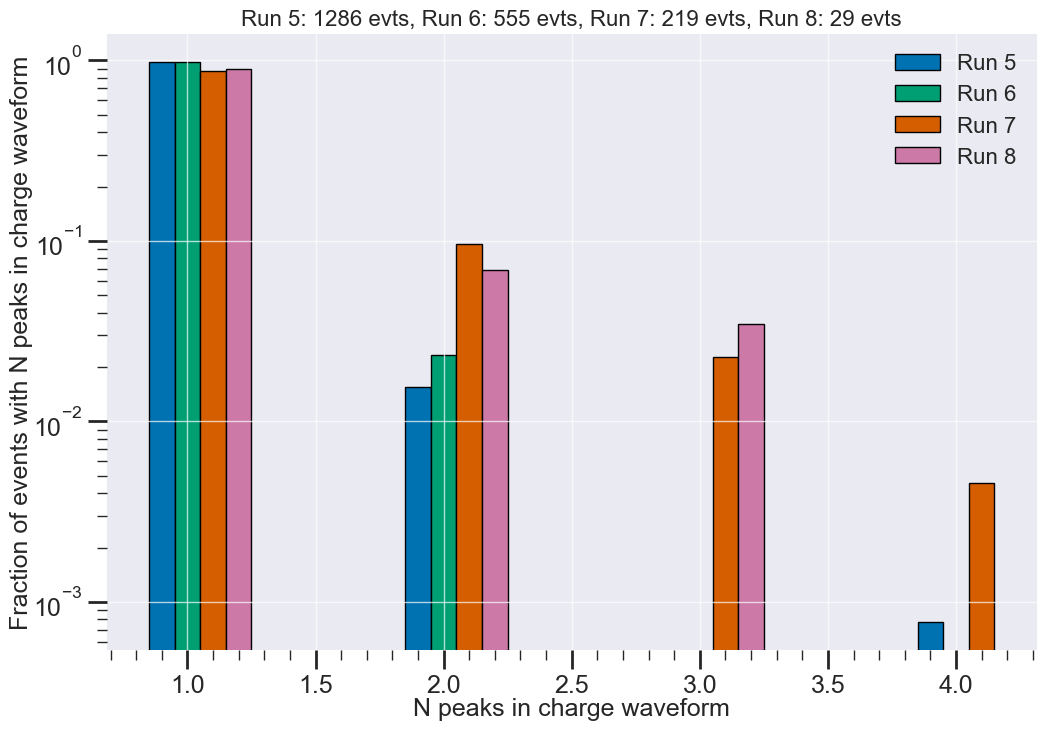

In [16]:
#Multiplicities
fig, ax = plt.subplots()
barwidth = 0.1
total_events_run = {}
for i, (run, ana) in enumerate(anas.items()):
    d = ana.df
    npeaks = np.array(d["ch3 n peaks"])
    npeaks = npeaks[~np.equal(npeaks, None)]
    npeaks_set = list(set(npeaks))
    npeaks_count = {}
    total_nonzero = 0
    for n in npeaks_set:
        npeaks_count[n] = len(np.where(npeaks == n)[0])
        if(n != 0):
            total_nonzero += npeaks_count[n]
    plotlist = []
    for n in npeaks_count:
        if(n == 0): continue
        plotlist.append(npeaks_count[n]/total_nonzero)
    
    total_events_run[run] = total_nonzero


    pos = np.array([_ for _ in npeaks_count if _ != 0])
    ax.bar(pos + (i - 1)*barwidth, plotlist, barwidth, label="Run {:d}".format(run))

ax.legend()
ax.set_yscale('log')
ax.set_ylabel("Fraction of events with N peaks in charge waveform")
ax.set_xlabel("N peaks in charge waveform")
ax.set_title("Run 5: {:d} evts, Run 6: {:d} evts, Run 7: {:d} evts, Run 8: {:d} evts".format(total_events_run[5],total_events_run[6],total_events_run[7], total_events_run[8]))
plt.show()


In [ ]:
#Multiplicities

for i, (run, ana) in enumerate(anas.items()):
    fig, ax = plt.subplots()
    d = ana.df
    npeaks = np.array(d["ch3 n peaks"])
    npeaks = npeaks[~np.equal(npeaks, None)]
    kv = np.array(d["ch3 hv"])
    kv = kv[~np.equal(kv, None)]
    ax.scatter(kv, npeaks, alpha=0.5, s=30)
    

    #ax.legend()
    ax.set_ylabel("N peaks in charge waveform")
    ax.set_xlabel("HV applied [kV]")
    ax.set_title("Run {:d}".format(run))
    #ax.set_xlim([5, 15])
    plt.show()


# Waveform plotting tools, which require cluster operation for access to prereduced

In [ ]:
#waveform plotting tool (not tested, need cluster where all prereduced data sits. )
for run, ana in anas.items():
    d = ana.df
    mask = (d["ch3 amp"] > 20)
    sw_chs = [3]
    events = ana.get_waveforms_from_cuts(mask, sw_chs)[3]
    fig, ax = plt.subplots()
    for ev in events:
        times = np.arange(0, ev["dT"]*1e6*len(ev["Data"][0]), ev["dT"]*1e6)
        ax.plot(times, ev["Data"][0])

    ax.legend()
    ax.set_xlabel("time [us]")
    ax.set_ylabel('[mV]')
    ax.set_title("run {:d} ({:d} events)".format(run, len(events)))
    plt.show()

## History plots

/var/folders/nr/f5dqj57n2yg5k0j2_ffmgmzm0000gn/T/ipykernel_95144/3276070356.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks_new)


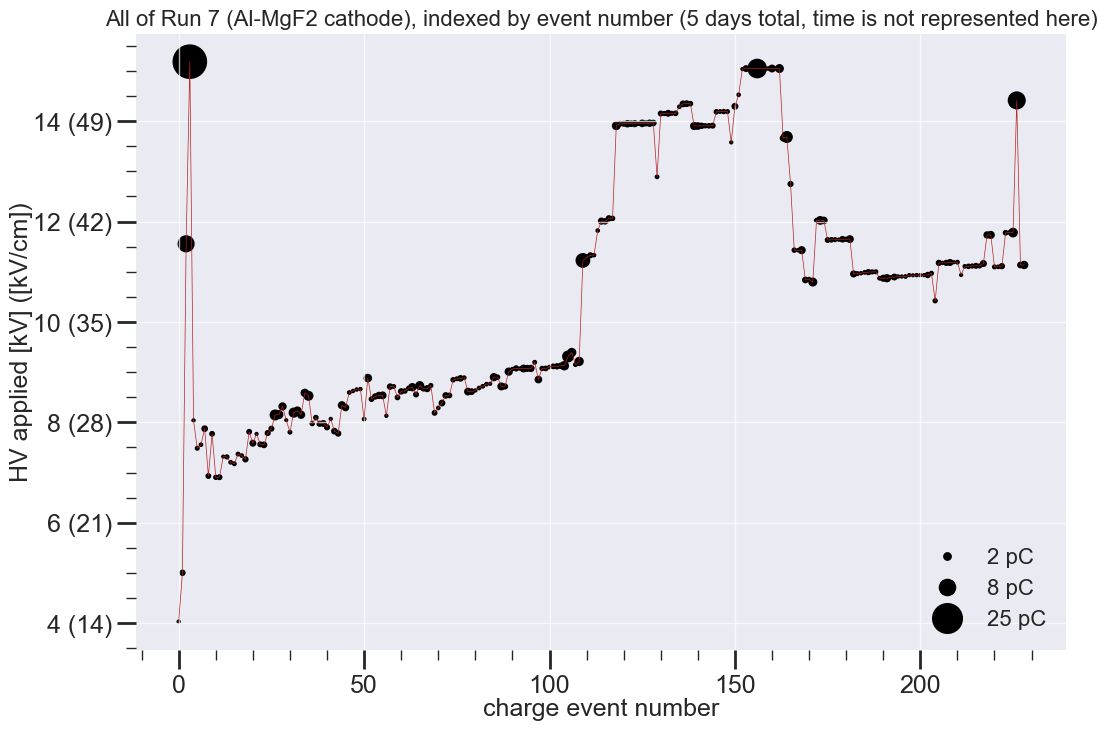

In [18]:
from matplotlib.lines import Line2D
d = anas[7].df
fig, ax = plt.subplots()

mask = (d["ch3 amp"] > 2) & (d["ch3 amp"] != None)
d_ch = np.array(d[mask]["ch3 charge"])
d_sec = np.array(d[mask]["ch3 seconds"])
d_hv = np.array(d[mask]["ch3 hv"])
d_E = np.array(d[mask]["ch3 field"])

#recast time
d_dt = [datetime.fromtimestamp(_) for _ in d_sec]

ax.plot(range(len(d_hv)), d_hv, '-', color='firebrick', linewidth=0.5)
ax.scatter(range(len(d_hv)), d_hv, s=list(np.array(d_ch)*20), color='k')


#field values are printed alongside the same ticks on the voltage axis
gap = 0.285 #cm
yticks_old = ax.get_yticklabels()
yticks_new = []
for yt in yticks_old:
    yticks_new.append(yt.get_text() + " ({:d})".format(int(float(yt.get_text())/gap)))
ax.set_yticklabels(yticks_new)


# Define custom legend entries with markers
legend_elements = [
    Line2D([0], [0], marker='o', linewidth=0, color='k', markersize=np.sqrt(2*20), label='2 pC'),
    Line2D([0], [0], marker='o', linewidth=0, color='k', markersize=np.sqrt(8*20), label='8 pC'),
    Line2D([0], [0], marker='o', linewidth=0, color='k', markersize=np.sqrt(25*20), label='25 pC'),
]

# Add legend with custom legend entries
ax.legend(handles=legend_elements, loc='lower right')

ax.set_xlabel("charge event number")
ax.set_ylabel("HV applied [kV] ([kV/cm])")
ax.set_title("All of Run 7 (Al-MgF2 cathode), indexed by event number (5 days total, time is not represented here)")
plt.show()

/var/folders/nr/f5dqj57n2yg5k0j2_ffmgmzm0000gn/T/ipykernel_95144/1841248697.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks_new)


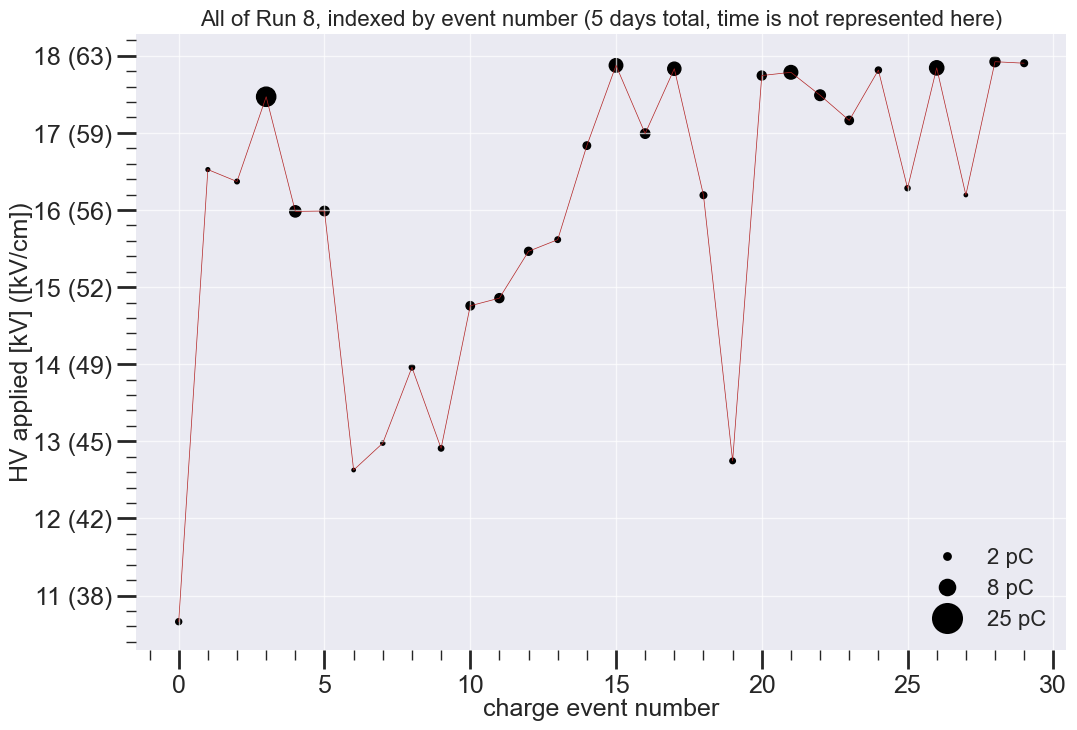

In [17]:
from matplotlib.lines import Line2D
d = anas[8].df
fig, ax = plt.subplots()

mask = (d["ch3 amp"] > 2) & (d["ch3 amp"] != None)
d_ch = np.array(d[mask]["ch3 charge"])
d_sec = np.array(d[mask]["ch3 seconds"])
d_hv = np.array(d[mask]["ch3 hv"])
d_E = np.array(d[mask]["ch3 field"])

#recast time
d_dt = [datetime.fromtimestamp(_) for _ in d_sec]

ax.plot(range(len(d_hv)), d_hv, '-', color='firebrick', linewidth=0.5)
ax.scatter(range(len(d_hv)), d_hv, s=list(np.array(d_ch)*20), color='k')


#field values are printed alongside the same ticks on the voltage axis
gap = 0.285 #cm
yticks_old = ax.get_yticklabels()
yticks_new = []
for yt in yticks_old:
    try:
        field_int = int(float(yt.get_text())/gap)
    except:
        continue
    yticks_new.append(yt.get_text() + " ({:d})".format(field_int))
ax.set_yticklabels(yticks_new)


# Define custom legend entries with markers
legend_elements = [
    Line2D([0], [0], marker='o', linewidth=0, color='k', markersize=np.sqrt(2*20), label='2 pC'),
    Line2D([0], [0], marker='o', linewidth=0, color='k', markersize=np.sqrt(8*20), label='8 pC'),
    Line2D([0], [0], marker='o', linewidth=0, color='k', markersize=np.sqrt(25*20), label='25 pC'),
]

# Add legend with custom legend entries
ax.legend(handles=legend_elements, loc='lower right')

ax.set_xlabel("charge event number")
ax.set_ylabel("HV applied [kV] ([kV/cm])")
ax.set_title("All of Run 8 (Al-Pt cathode), indexed by event number (8 days total, time is not represented here)")
plt.show()

# Drafting

In [ ]:
#get coincidence statistics
charge_thresh = 2
coinc = 0
coinc_ns = 0.3e9
for run, ana in anas.items():
    if(run != 7): continue
    d = ana.df
    mask = (d["ch3 amp"] > charge_thresh)
    target_events = d[mask]
    coinc_events = ana.get_coincidence(target_events, 3, coinc, coinc_ns)
    #combine this list of sub-dfs because I'm interested in global behavior here
    fig, ax = plt.subplots()
    for i, (_, ev) in enumerate(target_events.iterrows()):
        cev = coinc_events[i]
        #get the total sum of trigger and afterpulse integral
        cev_0 = cev[~np.equal(cev["ch0 afterpulse integral"], None)]
        cev_1 = cev[~np.equal(cev["ch1 afterpulse integral"], None)]
        ch0_sum = np.array(cev_0["ch0 trigger integral"]) + np.array(cev_0["ch0 afterpulse integral"]) - 10*np.array(cev_0["ch0 postbaseline"])
        ch1_sum = np.array(cev_1["ch1 trigger integral"]) + np.array(cev_1["ch1 afterpulse integral"]) - 10*np.array(cev_1["ch1 postbaseline"])

        ch0_sum = np.sum(ch0_sum)
        ch1_sum = np.sum(ch1_sum)
        total_light = ch0_sum + ch1_sum

        ax.scatter(ev["ch3 charge"], total_light, color='k', s=15)

    ax.set_xlabel("charge [pC]")
    ax.set_ylabel("sum of integrals of all coincident PMT signals [mV*us]")
    ax.set_title("run {:d}".format(run))
    plt.show()

    

## Comparisons with analytic stored charge and energy

In [4]:
C = 20 #pF
cq = 1.6e-19

dQs = np.array(np.linspace(0.5, 50, 100)) #pC
Vs = np.array(np.linspace(0, 18, 100)) #kV
Es = Vs/0.285
Qs = C*Vs*1000 #pC

U = 0.5*(Qs**2)/(C*1e6) #uJ

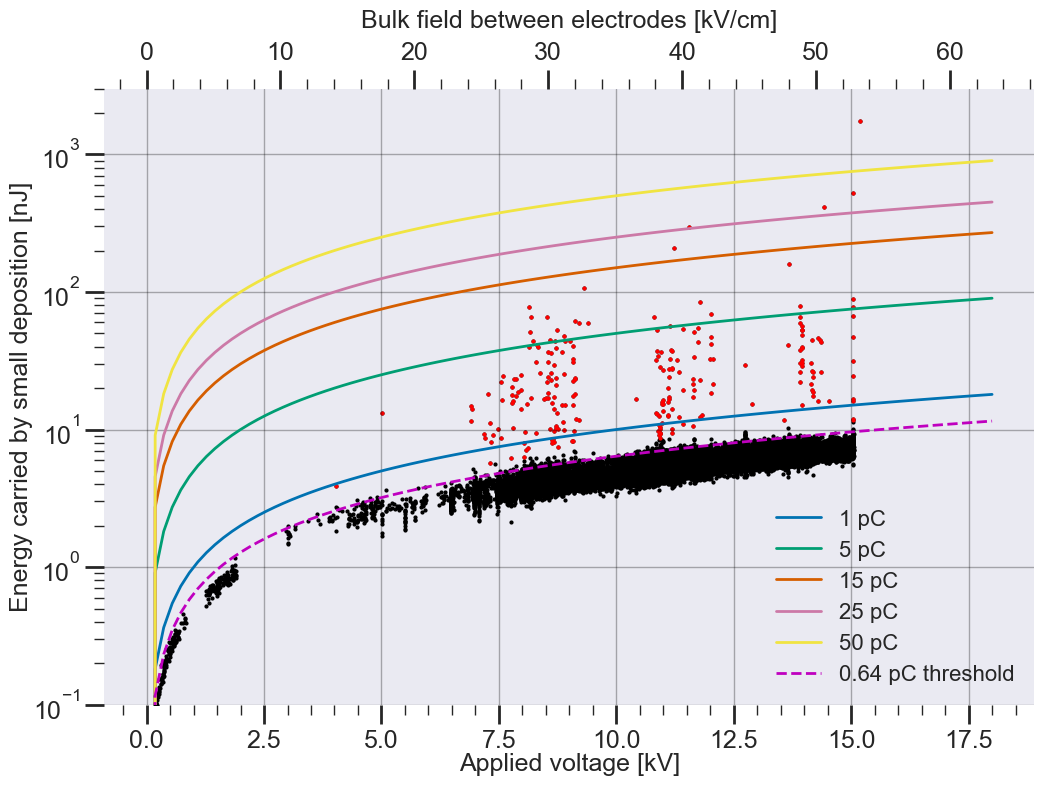

In [57]:
#get charge magnitudes and calculate partial energy
#deposited for each charge event in a run based on what
#voltage / total stored charge is in the gap at that moment. 




dQs = [1, 5, 15, 25, 50]
fig, ax = plt.subplots()
ax2 = ax.twiny()
for dq in dQs:
    dU = dq*Qs/(C*1e6) #uJ
    ax.plot(Vs, dU*1000, label="{:d} pC".format(dq))
    ax2.plot(Es, dU*1000, linewidth=0)

d = anas[7].df
hardware_threshold = 0.64 #pC
mask = (~d["ch3 energy"].isna()) 
du_evts = d[mask]
ax.scatter(np.array(du_evts["ch3 hv"]), np.array(du_evts["ch3 energy"]), color='k')
ax.plot(Vs, hardware_threshold*Vs, 'm--', label="{:.2f} pC threshold".format(hardware_threshold))

#above trip threshold, color differently. 
mask = (~d["ch3 energy"].isna()) & (d["ch3 amp"] > 2)
du_evts = d[mask]
ax.scatter(np.array(du_evts["ch3 hv"]), np.array(du_evts["ch3 energy"]), color='r')


ax2.grid(False)
ax2.set_xlabel("Bulk field between electrodes [kV/cm]", labelpad=10)
ax.set_xlabel("Applied voltage [kV]")
ax.set_ylabel("Energy carried by small deposition [nJ]")
ax.grid(color='k', alpha=0.3)
ax.set_yscale('log')
ax.set_ylim([1e-1, 3e3])
ax.legend()
plt.show()

/var/folders/nr/f5dqj57n2yg5k0j2_ffmgmzm0000gn/T/ipykernel_24648/2008372124.py:14: RuntimeWarning: invalid value encountered in divide
  ax.plot(Vs, dU/U, label="{:d} pC".format(dq))
/var/folders/nr/f5dqj57n2yg5k0j2_ffmgmzm0000gn/T/ipykernel_24648/2008372124.py:15: RuntimeWarning: invalid value encountered in divide
  ax2.plot(Es, dU/U, linewidth=0)
/var/folders/nr/f5dqj57n2yg5k0j2_ffmgmzm0000gn/T/ipykernel_24648/2008372124.py:33: RuntimeWarning: invalid value encountered in divide
  ax.plot(Vs, hardware_threshold*Vs*1000/(0.5*C*((Vs*1000)**2)), 'm--', label="{:.2f} pC threshold".format(hardware_threshold))


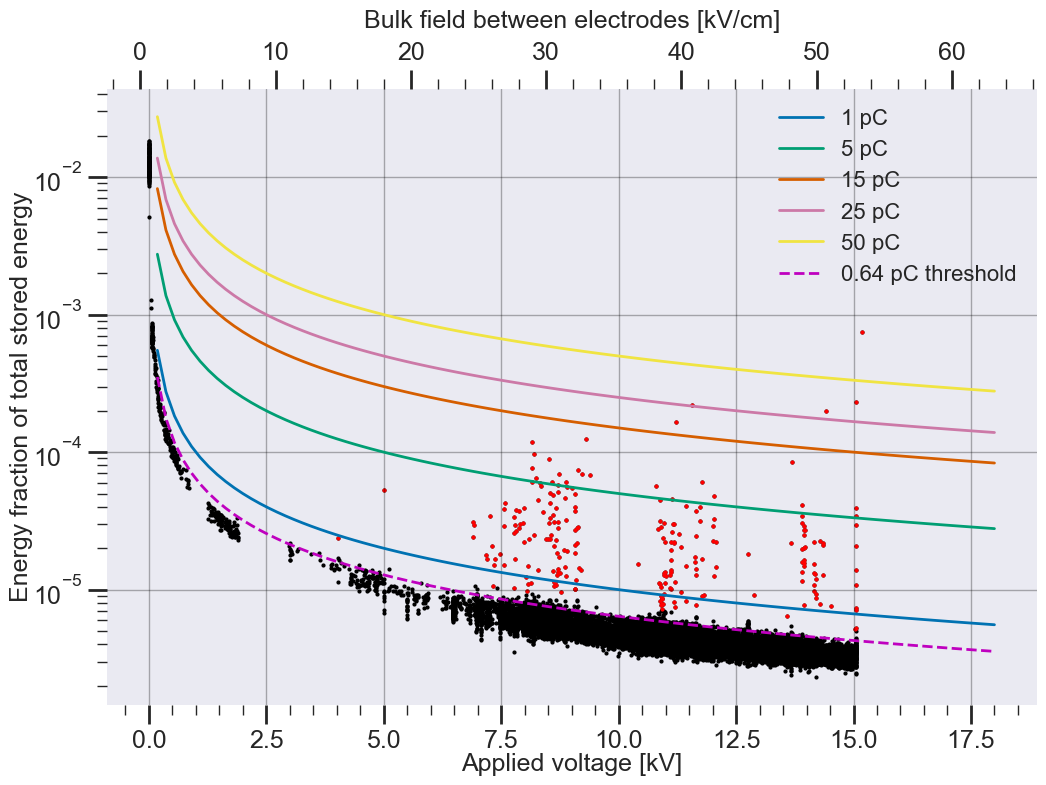

In [53]:
#get charge magnitudes and calculate partial energy
#deposited for each charge event in a run based on what
#voltage / total stored charge is in the gap at that moment. 

#Do the same as above but normalize relative to the total energy stored in the cap. 
#i.e. calculate fractional energy carried relative to the total energy. 


dQs = [1, 5, 15, 25, 50]
fig, ax = plt.subplots()
ax2 = ax.twiny()
for dq in dQs:
    dU = dq*Qs/(C*1e6) #uJ
    ax.plot(Vs, dU/U, label="{:d} pC".format(dq))
    ax2.plot(Es, dU/U, linewidth=0)


d = anas[7].df

mask = (~d["ch3 energy"].isna())
du_evts = d[mask]
total_energy = 0.5*C*(np.array(du_evts["ch3 hv"])*1000)**2
ax.scatter(np.array(du_evts["ch3 hv"]), np.array(du_evts["ch3 energy"])*1000/total_energy, color='k')

#above trip threshold, color differently. 
mask = (~d["ch3 energy"].isna()) & (d["ch3 amp"] > 2)
du_evts = d[mask]
total_energy = 0.5*C*(np.array(du_evts["ch3 hv"])*1000)**2
ax.scatter(np.array(du_evts["ch3 hv"]), np.array(du_evts["ch3 energy"])*1000/total_energy, color='r')


hardware_threshold = 0.64 #pC
ax.plot(Vs, hardware_threshold*Vs*1000/(0.5*C*((Vs*1000)**2)), 'm--', label="{:.2f} pC threshold".format(hardware_threshold))


ax2.grid(False)
ax2.set_xlabel("Bulk field between electrodes [kV/cm]", labelpad=10)
ax.set_xlabel("Applied voltage [kV]")
ax.set_ylabel("Energy fraction of total stored energy")
ax.grid(color='k', alpha=0.3)
ax.set_yscale('log')
#ax.set_ylim([1e-1, 3e3])
ax.legend()
plt.show()

/var/folders/nr/f5dqj57n2yg5k0j2_ffmgmzm0000gn/T/ipykernel_24648/94130786.py:18: RuntimeWarning: divide by zero encountered in divide
  ax.plot(Vs, hardware_threshold/Qs, 'm--',  label="{:.2f} pC threshold".format(hardware_threshold))


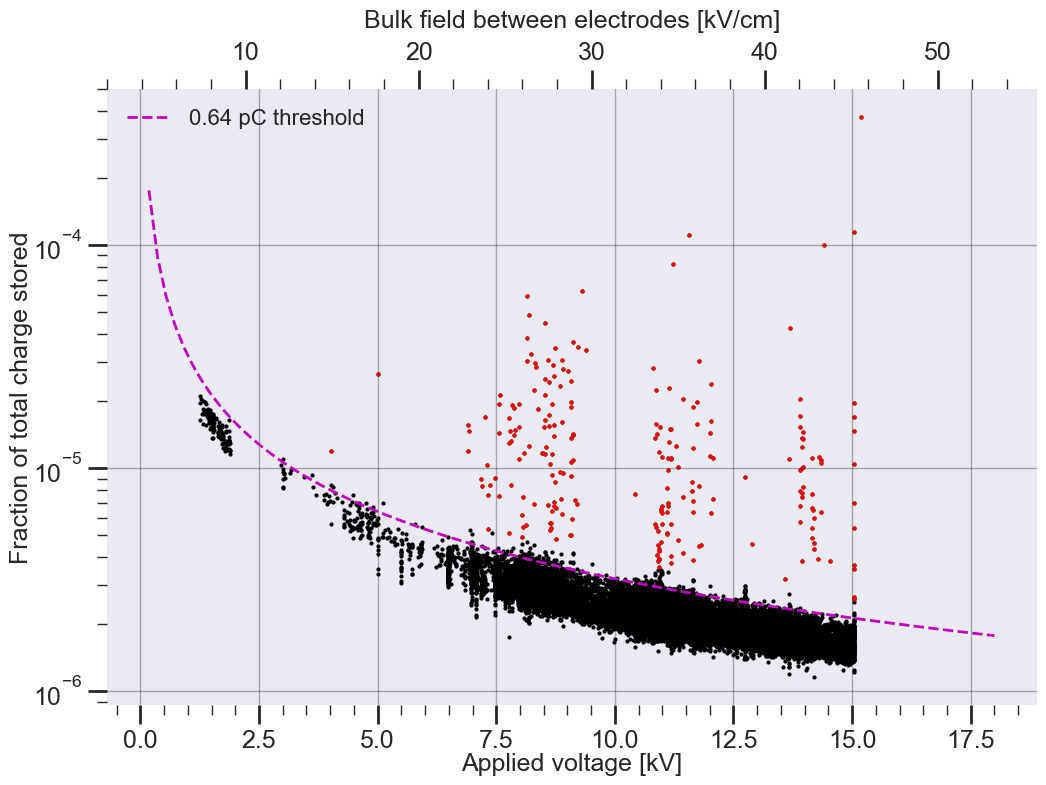

In [68]:
#similar as above, but now fractional stored charge. 

fig, ax = plt.subplots()



d = anas[7].df

mask = (~d["ch3 energy"].isna()) & (d["ch3 hv"] > 1)
du_evts = d[mask]

ax2 = ax.twiny()

total_q = np.array(du_evts["ch3 hv"])*1000*C
ax.scatter(np.array(du_evts["ch3 hv"]), np.array(du_evts["ch3 charge"])/total_q, color='k')
ax2.scatter(np.array(du_evts["ch3 field"]), np.array(du_evts["ch3 charge"])/total_q, color='k', alpha=0)
hardware_threshold = 0.64 #pC
ax.plot(Vs, hardware_threshold/Qs, 'm--',  label="{:.2f} pC threshold".format(hardware_threshold))

mask = (~d["ch3 energy"].isna()) & (d["ch3 amp"] > 2)
du_evts = d[mask]

total_q = np.array(du_evts["ch3 hv"])*1000*C
ax.scatter(np.array(du_evts["ch3 hv"]), np.array(du_evts["ch3 charge"])/total_q, color='r')


ax2.grid(False)
ax2.set_xlabel("Bulk field between electrodes [kV/cm]", labelpad=10)
ax.set_xlabel("Applied voltage [kV]")
ax.set_ylabel("Fraction of total charge stored")
ax.legend()
ax.grid(color='k', alpha=0.3)
ax.set_yscale("log")
plt.show()